# Gráficas de datos

Parte de la serie de conferencias de Quantopian:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Representar gráficamente los datos puede ser increíblemente útil para aprender cómo se comportan los datos y ver la estructura o los defectos potenciales. Se debe tener cuidado, ya que los humanos son increíblemente buenos al ver solo evidencia que confirma nuestras creencias, y los datos visuales se prestan bien a eso. Los diagramas son buenos para usar cuando se formula una hipótesis, pero no se deben usar para probar una hipótesis.

Vamos a repasar algunas tramas comunes aquí.

In [16]:
# Importar nuestras bibliotecas

# Esto es para procesamiento numérico
import numpy as np
# Esta es la biblioteca más comúnmente utilizada para trazar en Python.
# Observe cómo lo importamos 'como' plt, esto nos permite escribir plt
# en lugar de la cadena completa cada vez.
import matplotlib.pyplot as plt

## Obtener algunos datos

Si vamos a trazar los datos necesitamos algunos datos para trazar. Obtendremos los datos de precios de Apple (AAPL) y Microsoft (MSFT) para usar en nuestros ejemplos.

### Estructura de datos

Conocer la estructura de sus datos es muy importante. Normalmente, tendrá que trabajar muchísimo para moldear sus datos en la forma que necesita para las pruebas. Quantopian ha limpiado mucho los datos, pero aún necesita ponerlos en las formas y formatos correctos para sus propósitos.

En este caso, los datos se devolverán como un objeto de marco de datos pandas. Las filas son marcas de tiempo y las columnas son los dos activos, AAPL y MSFT.

In [2]:
# datos se devuelven como objeto pandas
start = '2014-01-01'
end = '2015-01-01'
data = get_pricing(['AAPL', 'MSFT'], fields='price', start_date=start, end_date=end)
data.head()

,Equity(24 [AAPL]),Equity(5061 [MSFT])
2014-01-02 00:00:00+00:00,77.405,36.155
2014-01-03 00:00:00+00:00,75.700,35.936
2014-01-06 00:00:00+00:00,76.107,35.167
2014-01-07 00:00:00+00:00,75.559,35.430
2014-01-08 00:00:00+00:00,76.043,34.797


La indexación en los datos con datos ['AAPL'] producirá un error porque el tipo de las columnas son objetos de equidad y no cadenas simples. Vamos a cambiar eso usando esta pequeña pieza de código Python. No se preocupe por entenderlo ahora, a menos que lo haga, en cuyo caso felicitaciones.

In [3]:
data.columns = [e.symbol for e in data.columns]
data.head()

,AAPL,MSFT
2014-01-02 00:00:00+00:00,77.405,36.155
2014-01-03 00:00:00+00:00,75.700,35.936
2014-01-06 00:00:00+00:00,76.107,35.167
2014-01-07 00:00:00+00:00,75.559,35.430
2014-01-08 00:00:00+00:00,76.043,34.797


Mucho mejor, ahora podemos indexar. La indexación en el marco de datos 2D nos dará un objeto de la serie 1D. El índice de la serie es marcas de tiempo, el valor sobre el índice es un precio. Similar a una matriz, excepto en lugar de enteros indecies es veces.

In [4]:
# indexamos
data['MSFT'].head()

2014-01-02 00:00:00+00:00    36.155
2014-01-03 00:00:00+00:00    35.936
2014-01-06 00:00:00+00:00    35.167
2014-01-07 00:00:00+00:00    35.430
2014-01-08 00:00:00+00:00    34.797
Freq: C, Name: MSFT, dtype: float64

##Histograma

Un histograma es una visualización de cuán frecuentes son los diferentes valores de los datos. Al mostrar una distribución de frecuencia usando barras, nos permite ver rápidamente dónde se agrupan la mayoría de las observaciones. La altura de cada barra representa el número de observaciones que se encuentran en cada intervalo. Puede pensar en un histograma como una función empírica y discreta de densidad de propagación (PDF).

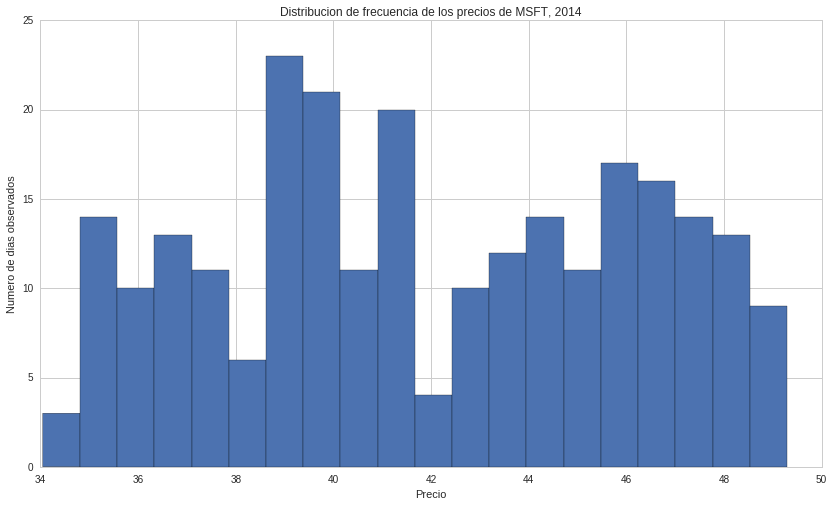

In [5]:
# Grafica un histograma usando 20 contenedores
plt.hist(data['MSFT'], bins=20)
plt.xlabel('Precio')
plt.ylabel('Numero de dias observados')
plt.title('Distribucion de frecuencia de los precios de MSFT, 2014');

### Retorno de un Histograma

En finanzas rara vez veremos la distribución de los precios. La razón de esto es que los precios no son estacionarios y se mueven mucho. Para obtener más información sobre no estacionariedad, consulte esta conferencia. En cambio usaremos devoluciones diarias. Probemos eso ahora. [this lecture](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity)

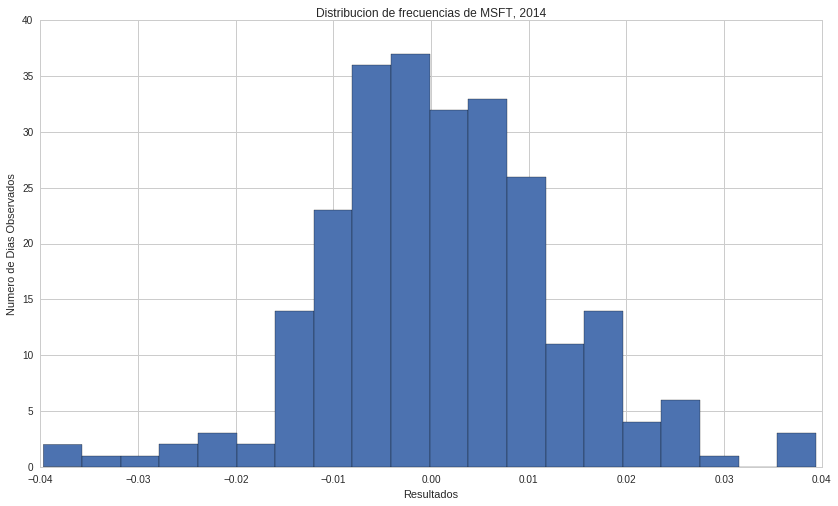

In [8]:
# Eliminar el primer elemento porque el porcentaje de cambio de nada a algo es NaN
R = data['MSFT'].pct_change()[1:]

# Grafica un histograma usando 20 contenedores
plt.hist(R, bins=20)
plt.xlabel('Resultados')
plt.ylabel('Numero de Dias Observados')
plt.title('Distribucion de frecuencias de MSFT, 2014');

El gráfico anterior muestra, por ejemplo, que los retornos diarios de MSFT estaban por encima de 0.03 en menos de 5 días en 2014. Tenga en cuenta que estamos descartando por completo las fechas correspondientes a estas devoluciones.

IMPORTANTE: Tenga en cuenta también que esto no implica que las devoluciones futuras tendrán la misma distribución.

### Histograma acumulado (FCD estimado discreto)

Una forma alternativa de mostrar los datos sería utilizar una función de distribución acumulativa, en la que la altura de una barra representa el número de observaciones que se encuentran en esa casilla o en una de las anteriores. Este gráfico es siempre no decreciente ya que no puede tener un número negativo de observaciones. La elección del gráfico depende de la información que le interesa.

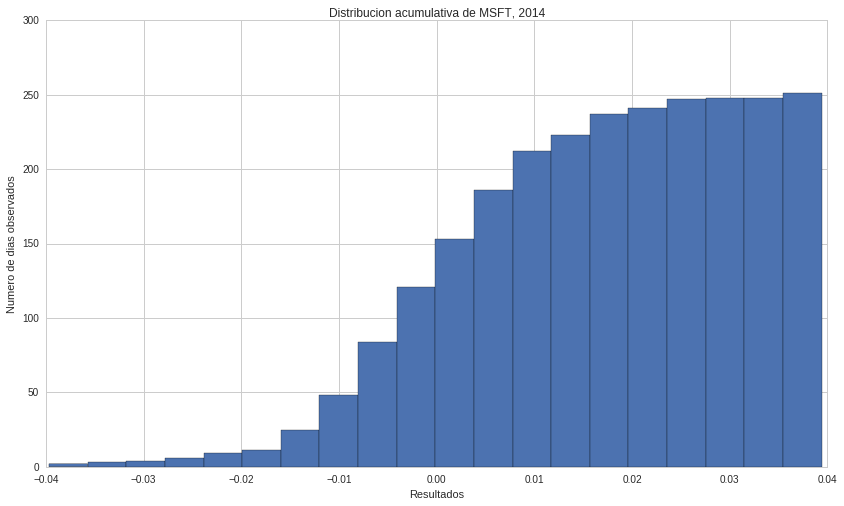

In [10]:
# Eliminar el primer elemento porque el porcentaje de cambio de nada a algo es NaN
R = data['MSFT'].pct_change()[1:]

# Grafica un histograma usando 20 contenedores
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Resultados')
plt.ylabel('Numero de dias observados')
plt.title('Distribucion acumulativa de MSFT, 2014');

## Gráfico de dispersión

Un diagrama de dispersión es útil para visualizar la relación entre dos conjuntos de datos. Usamos dos conjuntos de datos que tienen algún tipo de correspondencia, como la fecha en que se tomó la medición. Cada punto representa dos valores correspondientes de los dos conjuntos de datos. Sin embargo, no graficamos la fecha en que se tomaron las medidas.

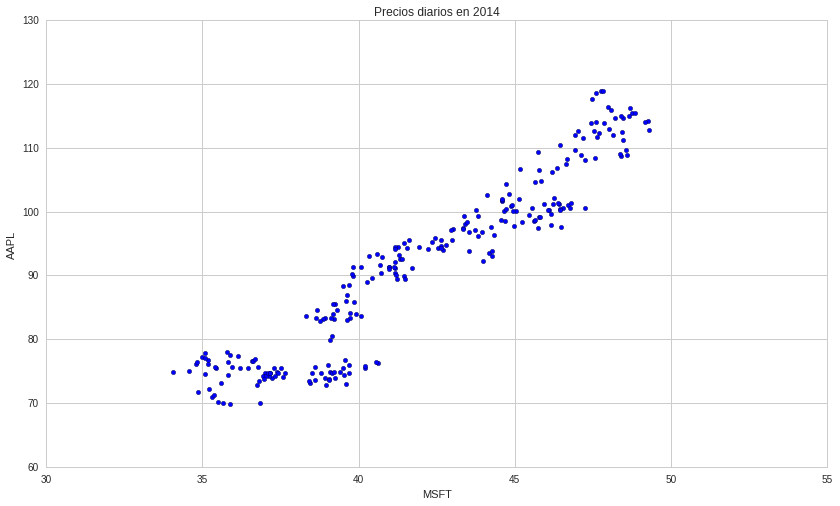

In [12]:
# grafica
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Precios diarios en 2014');

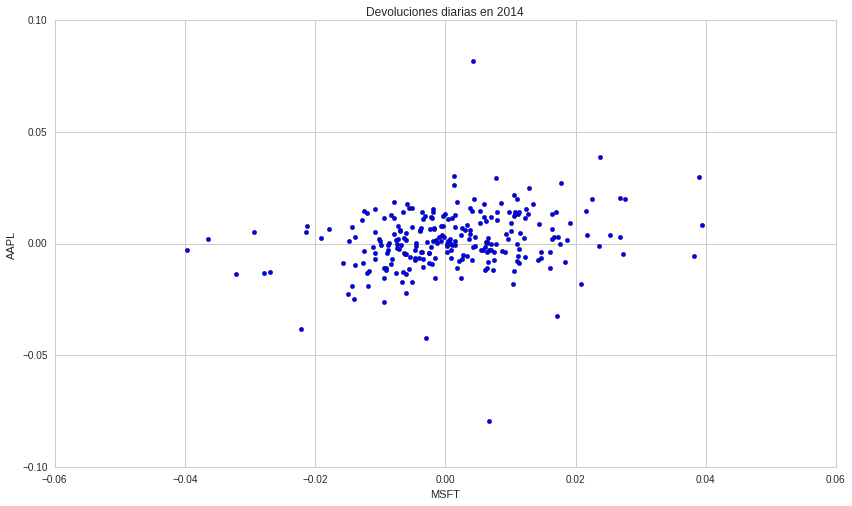

In [13]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Devoluciones diarias en 2014');

# Gráfico de línea

Se puede usar un gráfico de líneas cuando queremos rastrear el desarrollo del valor y a medida que cambia el valor x. Por ejemplo, cuando estamos trazando el precio de una acción, mostrarlo como un gráfico de líneas en lugar de simplemente trazar los puntos de datos hace que sea más fácil seguir el precio a lo largo del tiempo. Esto necesariamente implica "conectar los puntos" entre los puntos de datos, lo que puede enmascarar los cambios que ocurrieron entre el momento en que tomamos las medidas.

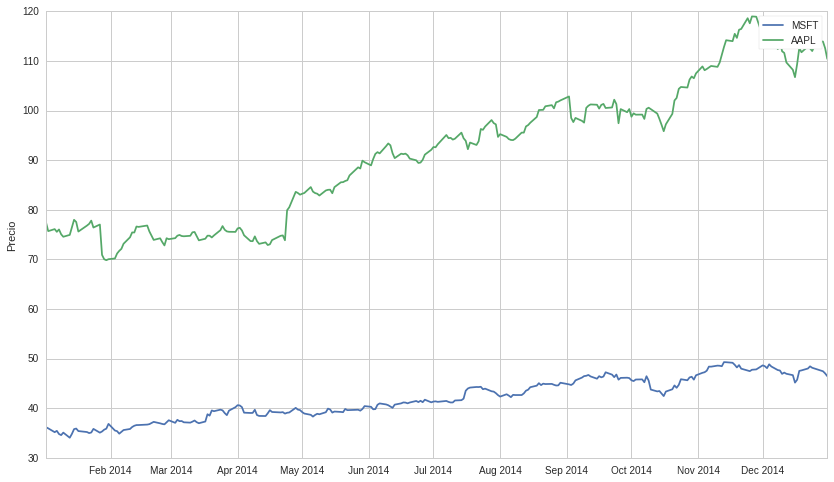

In [14]:
# grafica
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Precio')
plt.legend(['MSFT', 'AAPL']);

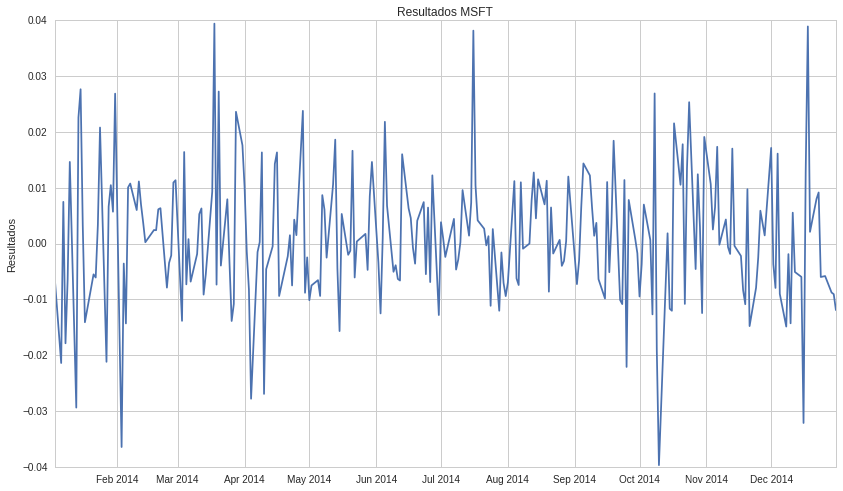

In [15]:
# Eliminar el primer elemento porque el porcentaje de cambio de nada a algo es NaN
R = data['MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Resultados')
plt.title('Resultados MSFT');

## Nunca asuma que las condiciones se mantienen

Una vez más, cada vez que utilice gráficos para visualizar datos, no suponga que puede probar una hipótesis mirando un gráfico. Tampoco asuma que debido a que una distribución o tendencia solía ser verdadera, sigue siendo cierta. En general, se requiere una validación mucho más sofisticada y cuidadosa para probar si los modelos se mantienen. Las parcelas son principalmente útiles al momento de decidir cómo deberían funcionar sus modelos.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*